In [4]:
from funciones import *

<img src="logoudesa.png" width="200" height="200" alt="udesa">


<h1><center> <font size="14">Trabajo Práctico 1<br> Análisis Matemático III </font></center></h1>

### Integrantes:
- Dehan Josefina
- Vulcano Facundo
- Hofkamp Nataly

### Punto 1.
 Nos dimos cuenta de que cumplen las propiedades de Dirichlet debido a la presencia de discontinuidades finitas, así como otras características relevantes. Para ilustrar este aspecto, presentamos gráficos que demuestran que trabajamos en intervalos específicos:

  - Señal diente de sierra en el intervalo [0, 2].
  - Señal tren de pulso en el intervalo [0, 4π].
  - Señal triangular en el intervalo [0, 4π].
  
Estos gráficos resaltan las características esenciales de las señales analizadas y respaldan nuestra observación de que cumplen las propiedades de Dirichlet.


Fenómeno de Gibbs en punto de discontinuidad 1:
Cantidad de armónicos: 10
Amplitud de Gibbs: 0.0
Fenómeno de Gibbs en punto de discontinuidad 2:
Cantidad de armónicos: 10
Amplitud de Gibbs: 0.42335897565353775
Fenómeno de Gibbs en punto de discontinuidad 3:
Cantidad de armónicos: 10
Amplitud de Gibbs: 0.6048057577969704
Fenómeno de Gibbs en punto de discontinuidad 4:
Cantidad de armónicos: 10
Amplitud de Gibbs: 0.7990953907247784
Fenómeno de Gibbs en punto de discontinuidad 1:
Cantidad de armónicos: 30
Amplitud de Gibbs: 0.0
Fenómeno de Gibbs en punto de discontinuidad 2:
Cantidad de armónicos: 30
Amplitud de Gibbs: 0.17059444378796518
Fenómeno de Gibbs en punto de discontinuidad 3:
Cantidad de armónicos: 30
Amplitud de Gibbs: 0.006839890036924756
Fenómeno de Gibbs en punto de discontinuidad 4:
Cantidad de armónicos: 30
Amplitud de Gibbs: 0.4236065922642799
Fenómeno de Gibbs en punto de discontinuidad 1:
Cantidad de armónicos: 50
Amplitud de Gibbs: 0.0
Fenómeno de Gibbs en punto de dis

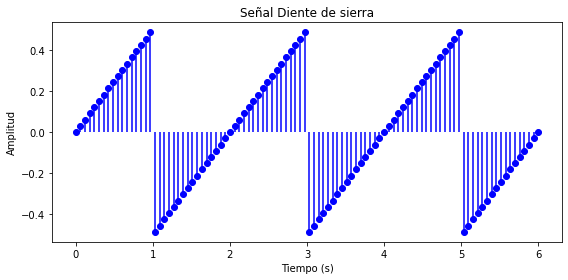

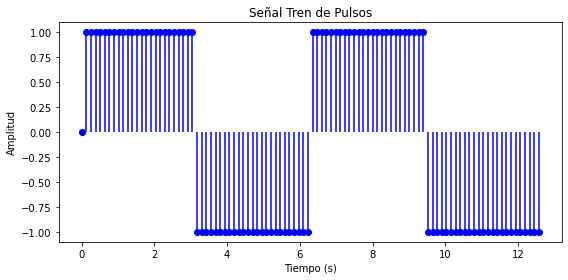

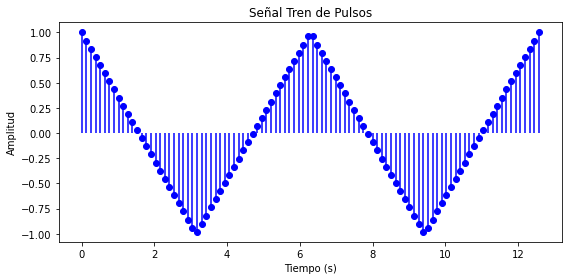

In [5]:
A = 1.0      
T = (2*np.pi)   
tren_pulsos, muestras_tren,series_tren= create_signal_serie(A,T,4*np.pi ,100,tren_de_pulsos,serie_tren_de_pulsos)
diente_sierra, muestras_diente,series_diente = create_signal_serie(A,2,6,100,diente_de_sierra,serie_diente_de_sierra)
señal_triangular, muestras_triangular, series_triangular = create_signal_serie(A, T, 4*np.pi, 100, triangular, serie_triangular)
plot(muestras_diente, diente_sierra, 'Señal Diente de sierra', 'Tiempo (s)', 'Amplitud', 'Diente de sierra')
plot(muestras_tren, tren_pulsos,'Señal Tren de Pulsos', 'Tiempo (s)', 'Amplitud', 'Tren de Pulsos')
plot(muestras_triangular, señal_triangular,'Señal Tren de Pulsos', 'Tiempo (s)', 'Amplitud', 'Tren de Pulsos')

### Punto 2: Cálculo de Series de Fourier
**Introducción**

Las Series de Fourier nos permiten descomponer una función periódica en una suma de funciones sinusoidales (senos y cosenos) o exponenciales complejas.

**Cálculo de Series de Fourier**

El cálculo de una Serie de Fourier para una función periódica $f(t)$ en un intervalo $T$ implica los siguientes pasos generales:

1. Determinar el período fundamental de la función $T$, que es el menor valor positivo de $T$ para el cual $f(t + T) = f(t)$ para todos los $t$.

2. Calcular los coeficientes de Fourier, que dependen del tipo de función y se utilizan para ponderar las componentes sinusoidales o exponenciales en la serie.

3. Escribir la Serie de Fourier en función de los coeficientes y las funciones base (senos y cosenos o exponenciales complejas).

**Cálculo de las Series Específicas**

Vamos a calcular las Series de Fourier para tres tipos de señales específicas:

1. **Tren de Pulsos**
[hay que aclarar si es par o impar, entre qué intervalos integramos, por qué y donde encontrar las cuentas en el latex]

   La ecuación para un tren de pulsos periódico en el intervalo $[0, T]$ es:
\begin{equation*}
F(x) = \sum_{n = 1}^{\infty} \frac{4}{T} A \left[[\frac{-\cos(nw \frac{T}{2}) - 1}{nw}] \sin(nwt)\right] 
\end{equation*}

2. **Señal Diente de Sierra**
[hay que aclarar si es par o impar, entre qué intervalos integramos, por qué y donde encontrar las cuentas en el latex]

   La ecuación para una señal diente de sierra periódica en el intervalo $[0, T]$ es:

\begin{equation*}
F(x) = \sum_{n = 1}^{\infty} \frac{4 A}{T^2}  \left[[-\frac{T(\cos(nw \frac{T}{2}))}{2nw} - \frac{\sin(nw \frac{T}{2})}{(wn)^2}]\right] \sin(nwt)
\end{equation*}


3. **Señal Triangular**
[hay que aclarar si es par o impar, entre qué intervalos integramos, por qué y donde encontrar las cuentas en el latex]
   La ecuación para una señal triangular periódica en el intervalo $[0, T]$ es:

\begin{equation*}
F(t) = \sum_{n \text{ impar}} \frac{8A}{n^2 \pi^2} \cos(n \omega_0 t)
\end{equation*}


## Punto 3. 

A continuación mostramos las funciones utilizadas para generar las Series de Fourier de cada señal. Estas, reciben el Periodo, la amplitud de las señales y la cantidad de armónicos utilizar.


In [6]:

def serie_diente_de_sierra(A,T, muestras, cant_armonicos):
    serie = []
    for t in muestras:
        armonicos = 0
        for n in range(1, cant_armonicos+1):
            w = (2*np.pi/T)
            a = (4*A/(T**2))
            alpha = w*n*T/2
            b = (T/(2*w*n))
            armonicos += (a*((b*(-np.cos(alpha)))+(np.sin(alpha)/((w*n)**2))) * np.sin(w*n*t))
        serie.append(armonicos)
    return serie

def serie_tren_de_pulsos(A,T, muestras, cant_armonicos):
    serie = []
    w= (2*np.pi/T)
    for t in muestras:
        armonicos = 0
        for n in range(1, cant_armonicos + 1):
            armonicos += ((4*A/(T*n*w))*(1-np.cos(n*w*T/2)) * np.sin(n *w * t))
        serie.append(armonicos)
    return serie

def serie_triangular(A, T, muestras, cant_armonicos):
    serie = np.zeros_like(muestras)
    w0 = 2*np.pi / T
    a_0 = 0
    serie += a_0 / 2

    for n in range(1, cant_armonicos*2, 2):
        a_n = (8 * A) / (n ** 2 * np.pi**2)
        serie += a_n * np.cos(n * w0 * muestras)
    return serie

## Punto 4.
A continuación, se presentan los gráficos para cada señal. Se observa que a mayor cantidad de armónicos, nuestra serie se acerca más a la señal original, ya que las ondulaciones son menores y puede simular una línea en algunos intervalos, por lo general, cuanto más alejados estén de los puntos de discontinuidad. Se evidencian picos en los puntos de discontinuidad, pero a su vez se observa una reducción en ellos a medida que aumentan los armónicos

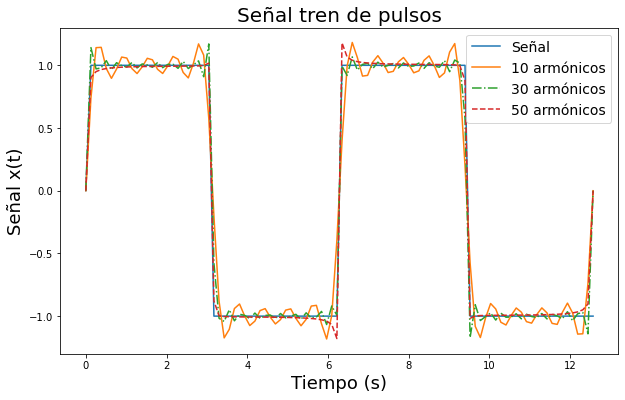

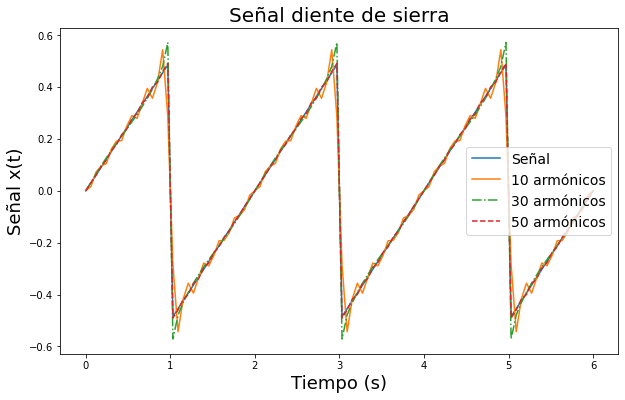

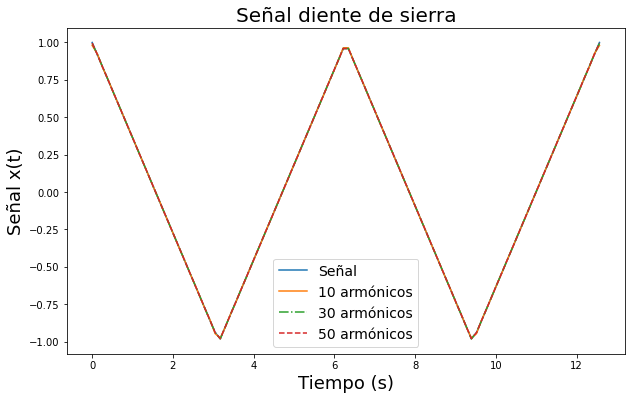

In [7]:
graphs(muestras_tren,tren_pulsos,series_tren,'Señal tren de pulsos')
graphs(muestras_diente,diente_sierra,series_diente,'Señal diente de sierra')
graphs(muestras_triangular,señal_triangular,series_triangular,'Señal diente de sierra')

## Punto 5. fenómeno de Gibbs.
Al realizar las pruebas del fenómeno de gibbs en los puntos de discontinuidad de cada función observamos los siguientes resultados 
A medida que aumentamos la cantidad de armónicos en la serie, las amplitudes de Gibbs disminuyen, lo cual es un comportamiento esperado. Este comportamiento es una propiedad del fenómeno de Gibbs y se refleja en la disminución de la magnitud de las oscilaciones en los puntos de discontinuidad a medida que se consideran más armónicos.


1. **Señal Trem de Pulsos**  (cambiar los números por las coordenadas)
    [fijarse por qué hay uno que da cero, no debe ser un  punto discontinuo]

| Punto de Discontinuidad | Cantidad de Armónicos | Amplitud de Gibbs |
|-------------------------|------------------------|--------------------|
| 1                       | 10                     | 0.0                |
| 2                       | 10                     | 0.42335897565353786|
| 3                       | 10                     | 0.6048057577969704 |
| 4                       | 10                     | 0.7990953907247784 |
| 1                       | 30                     | 0.0                |
| 2                       | 30                     | 0.17059444378796496|
| 3                       | 30                     | 0.006839890036924756|
| 4                       | 30                     | 0.4236065922642799 |
| 1                       | 50                     | 0.0                |
| 2                       | 50                     | 0.017473927832714953|
| 3                       | 50                     | 0.17901169427515629|
| 4                       | 50                     | 0.12090421850611177|



2. **Señal Diente de Sierra**  

| Punto de Discontinuidad | Cantidad de Armónicos | Amplitud de Gibbs |
|------------------------|-----------------------|-------------------|
| 1                      | 10                    | 0.0888007995456066|
| 2                      | 10                    | 0.19892398375832038|
| 3                      | 10                    | 0.08880079954560627|
| 4                      | 10                    | 0.19892398375831966|
| 5                      | 10                    | 0.08880079954560594|
| 6                      | 10                    | 0.19892398375831905|
| 1                      | 30                    | 0.024509599346801136|
| 2                      | 30                    | 0.0865245616602166|
| 3                      | 30                    | 0.024509599346800526|
| 4                      | 30                    | 0.08652456166021705|
| 5                      | 30                    | 0.02450959934680008|
| 6                      | 30                    | 0.08652456166021771|
| 1                      | 50                    | 0.004757972412938405|
| 2                      | 50                    | 0.005596544483390975|
| 3                      | 50                    | 0.00475797241293846|
| 4                      | 50                    | 0.005596544483389754|
| 5                      | 50                    | 0.00475797241293785|
| 6                      | 50                    | 0.005596544483390087|

3. **Señal Triangular**
La señal triangular es un ejemplo de una senial periodica sin discontinuidades. Aunque se podria esperar que la aproximacion por series de Fourier sea perfecta debido a la ausencia de discontinuidades, en la practica, la reconstruccion de la senial utilziando un numero finito de armonicos no sera exacta. En la siguiente tabla no muestramos el fenomeno de gibbs para la triangular sino que el erorr observado al aproximar esta senial con un numero determinado de armonicos.


| Punto de "Discontinuidad" | Cantidad de Armónicos | Error    |
|--------------------------|-----------------------|-----------------------------|
| 1                        | 10                    | 0.020247408507700237        |
| 2                        | 10                    | 0.005543044835911393        |
| 1                        | 30                    | 0.0067541203797634175       |
| 2                        | 30                    | 0.0007478521083831291       |
| 1                        | 50                    | 0.004052712269688841        |
| 2                        | 50                    | 7.4072915605682965e-06      |



### Punto 6. Error Cuadrático  [texto chat gpt]
Este código es una implementación en Python de un procedimiento para aproximar una señal utilizando la Serie de Fourier y luego determinar cuántos armónicos son necesarios para alcanzar un valor de Error Cuadrático Medio (ECM) deseado. Veamos las funciones y su funcionamiento:

1. `calculate_ECM(signal, approx)`: Esta función calcula el ECM entre una señal original y su aproximación. Toma dos arrays, `signal` y `approx`, y devuelve la media de las diferencias cuadradas entre los elementos de `signal` y `approx`.

2. `calculate_ECM_excluding_discontinuities(signal, approx, discontinuity_indices)`: Esta función calcula el ECM excluyendo los puntos de discontinuidad en la señal original. Toma los mismos parámetros que `calculate_ECM` junto con un array `discontinuity_indices` que contiene los índices de los puntos de discontinuidad. La función elimina estos puntos antes de calcular el ECM.

3. `approximate_signal(A, T, muestras, signal, serie, target_ECM)`: Esta función es el corazón del procedimiento. Aproxima una señal utilizando la Serie de Fourier con un número creciente de armónicos hasta que el ECM sea menor o igual al valor deseado `target_ECM`. Los parámetros de entrada son:
   - `A`: Amplitud máxima de la serie de Fourier.
   - `T`: Período de la señal.
   - `muestras`: Número de muestras de la señal.
   - `signal`: La señal original a aproximar.
   - `serie`: Una función que calcula la aproximación de la señal utilizando la Serie de Fourier con un número dado de armónicos.
   - `target_ECM`: El valor de ECM deseado.

   La función inicia con un ECM inicial infinito y va aumentando el número de armónicos uno por uno hasta que se alcanza o se supera el `target_ECM`. Lleva un registro de los valores de ECM a lo largo de este proceso y finalmente traza un gráfico para visualizar cómo cambia el ECM en función del número de armónicos. El gráfico utiliza una escala logarítmica en el eje y para una mejor visualización.

   Al final, la función devuelve la cantidad de armónicos necesarios para alcanzar el `target_ECM`.

El código es útil para determinar cuántos armónicos se necesitan para aproximar una señal con una precisión específica utilizando la Serie de Fourier y para visualizar cómo el ECM disminuye a medida que se agregan más armónicos.

In [8]:
def calculate_ECM(signal, approx, auto_threshold=False):
    """
    Calcula el Error Cuadrático Medio (ECM) entre la señal original y la aproximación.

    Parámetros:
    signal (array): La señal original.
    approx (array): La señal aproximada.
    auto_threshold (bool): Indica si se debe calcular automáticamente el umbral de descuento.

    Retorna:
    float: El valor del ECM calculado.
    """
    N = 0
    e = 0
    if auto_threshold:
        threshold = np.max(np.abs(np.diff(signal))) * 0.1
    else:
        threshold = 0.1  # Puedes ajustar este valor manualmente si no deseas el umbral automático
    
    for i in range(len(signal) - 1):
        if np.abs(signal[i] - signal[i + 1]) < threshold:
            N += 1
            e += (signal[i] - approx[i])**2
    
    if N > 0:
        e *= 1/N
    else:
        e = 0.0
    
    return e

def calculate_ECM_excluding_discontinuities(signal, approx, discontinuity_indices):
    """
    Calcula el Error Cuadrático Medio (ECM) excluyendo los puntos de discontinuidad.
    """
    discontinuity_indices = np.array(discontinuity_indices)
    valid_indices = np.delete(np.arange(len(signal)), discontinuity_indices)
    return np.mean((signal[valid_indices] - approx[valid_indices])**2)


## Punto 7. 
El Error Cuadrático Medio (ECM) se utiliza para cuantificar la discrepancia entre la señal original y su aproximación, y para reducir este error a un valor específico, se requiere un número determinado de armónicos. A medida que aumenta la cantidad de armónicos, el error tiende a disminuir, lo que significa que la aproximación se vuelve más precisa y se acerca cada vez más a la señal original. Por lo tanto, el número de armónicos necesario para alcanzar un nivel de precisión deseado. 



In [12]:
def approximate_signal(A, T, muestras, signal, serie, target_ECM, auto_threshold=False):
    """
    Aproxima una señal utilizando Series de Fourier hasta que el ECM sea menor o igual al valor de target_ECM.
    Retorna la cantidad de armónicos necesarios para alcanzar el target_ECM.

    Parámetros:
    A (float): Amplitud máxima de la serie de Fourier.
    T (float): Período de la señal.
    muestras (array): Muestras de tiempo.
    signal (array): La señal original.
    serie (function): Función que calcula la aproximación de la señal.
    target_ECM (float): Valor de referencia para el ECM.
    auto_threshold (bool): Indica si se debe calcular automáticamente el umbral de descuento.

    Retorna:
    int: La cantidad de armónicos necesarios para alcanzar el target_ECM.
    """
    current_ECM = np.inf 
    cant_armonicos = 0
    discontinuity_indices = np.where(np.diff(signal) != 0)[0]  
    total_ECM_values = []  
    valid_ECM_values = []  
    while current_ECM > target_ECM and cant_armonicos < 500:
        cant_armonicos += 1
        approx_signal = np.array(serie(A, T, muestras, cant_armonicos))
        current_ECM = calculate_ECM(signal, approx_signal, auto_threshold)
        valid_ECM = calculate_ECM_excluding_discontinuities(signal, approx_signal, discontinuity_indices)
        total_ECM_values.append(current_ECM)
        valid_ECM_values.append(valid_ECM)

    print(f'Armónicos: {cant_armonicos}, ECM Total: {current_ECM}, ECM Excluyendo Discontinuidades: {valid_ECM}')

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, cant_armonicos + 1), total_ECM_values, label='ECM Total')
    plt.plot(range(1, cant_armonicos + 1), valid_ECM_values, label='ECM Excluyendo Discontinuidades')
    plt.title('Error Cuadrático Medio (ECM) vs. Cantidad de Armónicos')
    plt.xlabel('Cantidad de Armónicos')
    plt.ylabel('ECM')
    plt.yscale('log')  
    plt.legend()
    plt.show()

    return cant_armonicos


| Señal               | Error Esperado | ECM       | Cantidad de Armónicos |
|---------------------|----------------|-----------|------------------------|
| Tren de Pulsos      | 0.5            | 0.1877    | 1                      |
| Diente de Sierra    | 0.5            | 0.1321    | 1                      |
| Tren de Pulsos      | 0.1            | 0.0986    | 3                      |
| Diente de Sierra    | 0.1            | 0.1311    | 500                    |
| Tren de Pulsos      | 0.01           | 0.0100    | 500                    |
| Diente de Sierra    | 0.01           | 0.1311    | 500                    |


## Punto 8.

A medida que aumentamos el número de armónicos utilizados en la aproximación mediante la serie de Fourier, observamos un efecto claro en la precisión de la aproximación y en el error cuadrático medio (ECM) entre la señal aproximada y la señal original. Este proceso es fundamental para lograr una representación cada vez más precisa de señales periódicas, ya que los armónicos adicionales permiten capturar detalles más finos en la forma de la señal. Sin embargo, cerca de discontinuidades o cambios bruscos en la señal, pueden aparecer oscilaciones no deseadas, conocidas como el fenómeno de Gibbs, que requieren una consideración cuidadosa al seleccionar el número óptimo de armónicos.


In [10]:
def graphs(muestras, signal_, series, title):
    """
    Genera gráficos de una señal y sus aproximaciones.

    Parámetros:
    muestras (array): Muestras de tiempo.
    signal_ (array): La señal original.
    series (list): Lista de tuplas con series de Fourier y parámetros.
    title (str): Título del gráfico.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(muestras, signal_, label='Señal')
    for serie, cant_armonicos, linestyle in series:
        plt.plot(muestras, serie, label=f'{cant_armonicos} armónicos', linestyle=linestyle)
    plt.title(title, fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=18)
    plt.ylabel('Señal x(t)', fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

def create_signal_serie(A, T, periodo, cant_muestras, signal, serie):
    """
    Crea una señal, calcula su serie de Fourier y muestra gráficos.

    Parámetros:
    A (float): Amplitud máxima de la serie de Fourier.
    T (float): Período de la señal.
    periodo (float): Período de muestreo.
    cant_muestras (int): Cantidad de muestras.
    signal (function): Función que genera la señal original.
    serie (function): Función que calcula la aproximación de la señal.

    Retorna:
    tuple: Una tupla con la señal, las muestras y las series de Fourier.
    """
    muestras = np.linspace(0, periodo, cant_muestras)
    signal_ = signal(A, T, muestras)
    series = []
    for cant_armonicos, linestyle in [(10, 'solid'), (30, '-.'), (50, '--')]:
        serie_ = serie(A, T, muestras, cant_armonicos)
        series.append((serie_, cant_armonicos, linestyle))
    fenomeno_gibbs(signal_, series, T)
    return (signal_, muestras, series)

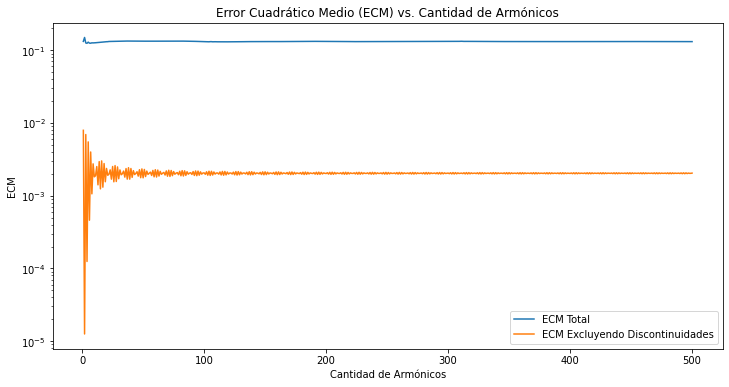

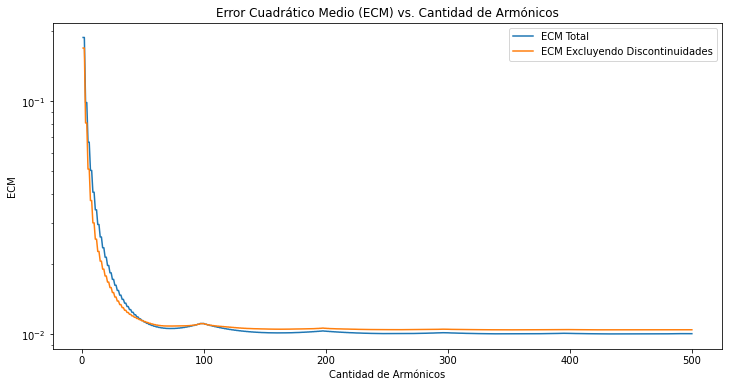

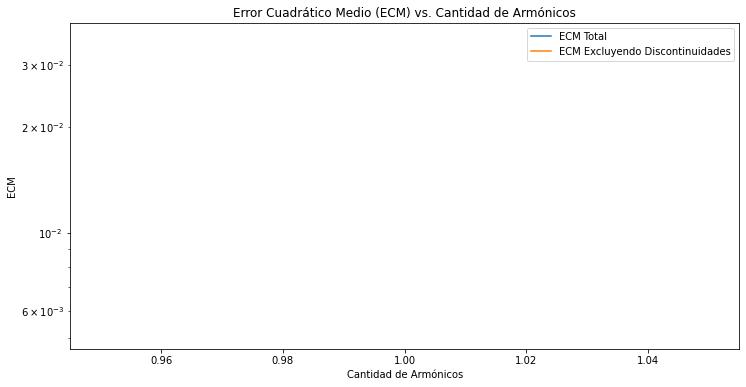

1

In [11]:
approximate_signal(A,T,muestras_diente,diente_sierra,serie_diente_de_sierra,0.01)
approximate_signal(A,T,muestras_tren,tren_pulsos,serie_tren_de_pulsos,0.01)
approximate_signal(A,T,muestras_triangular,señal_triangular,serie_triangular,0.01)